In [1]:
from src import data_loader, utils
import yaml

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
config = yaml.safe_load(open("config/config.yaml"))

df = data_loader.load_data(config['data']['raw_path'])

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome[0] = No Diabetes


Outcome[1] = Diabetes

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

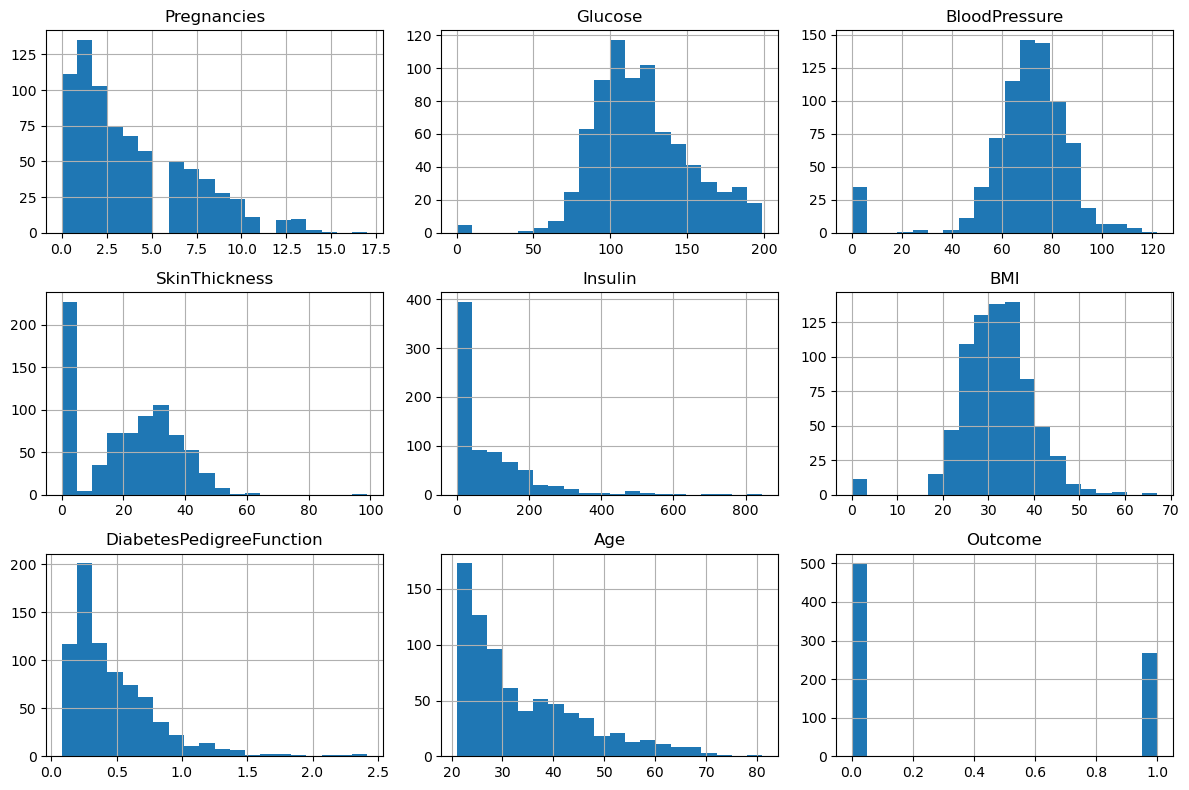

In [8]:
# All Features - Distribution plot
df.hist(bins=20, figsize=(12, 8), layout=(3, 3))

plt.tight_layout()
plt.show()

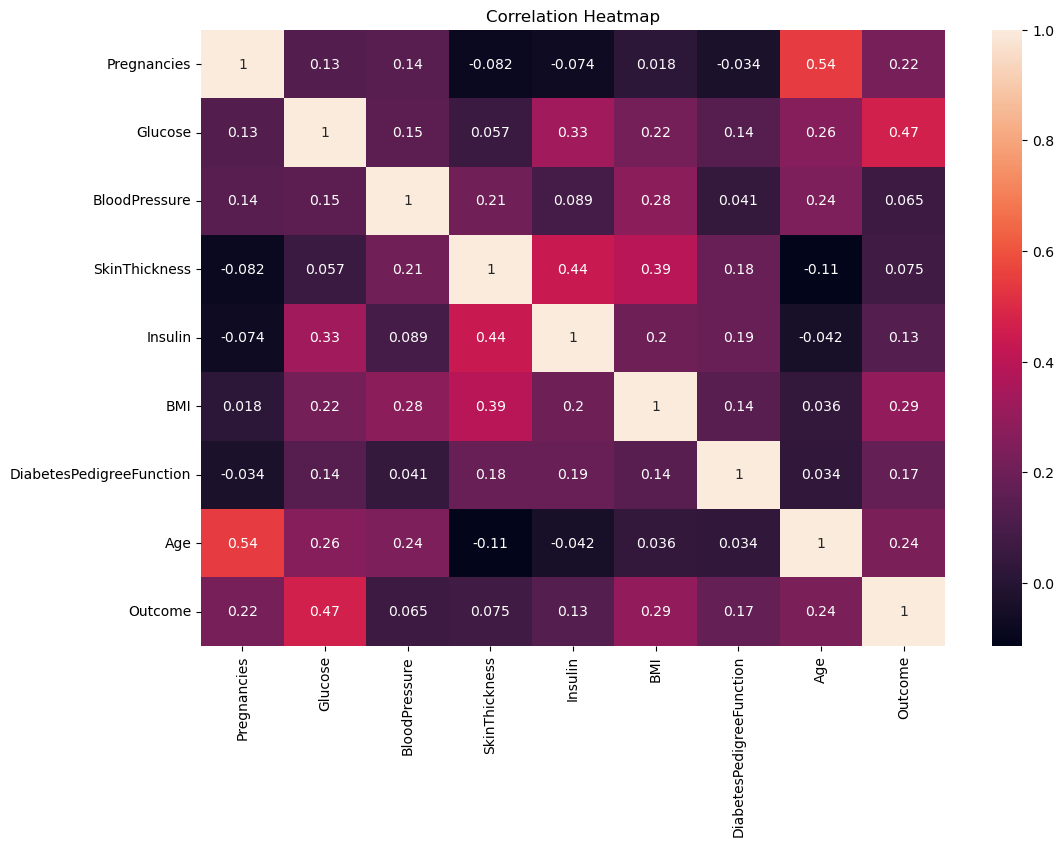

In [9]:
# Correlation heatmap
utils.heatmap(df)

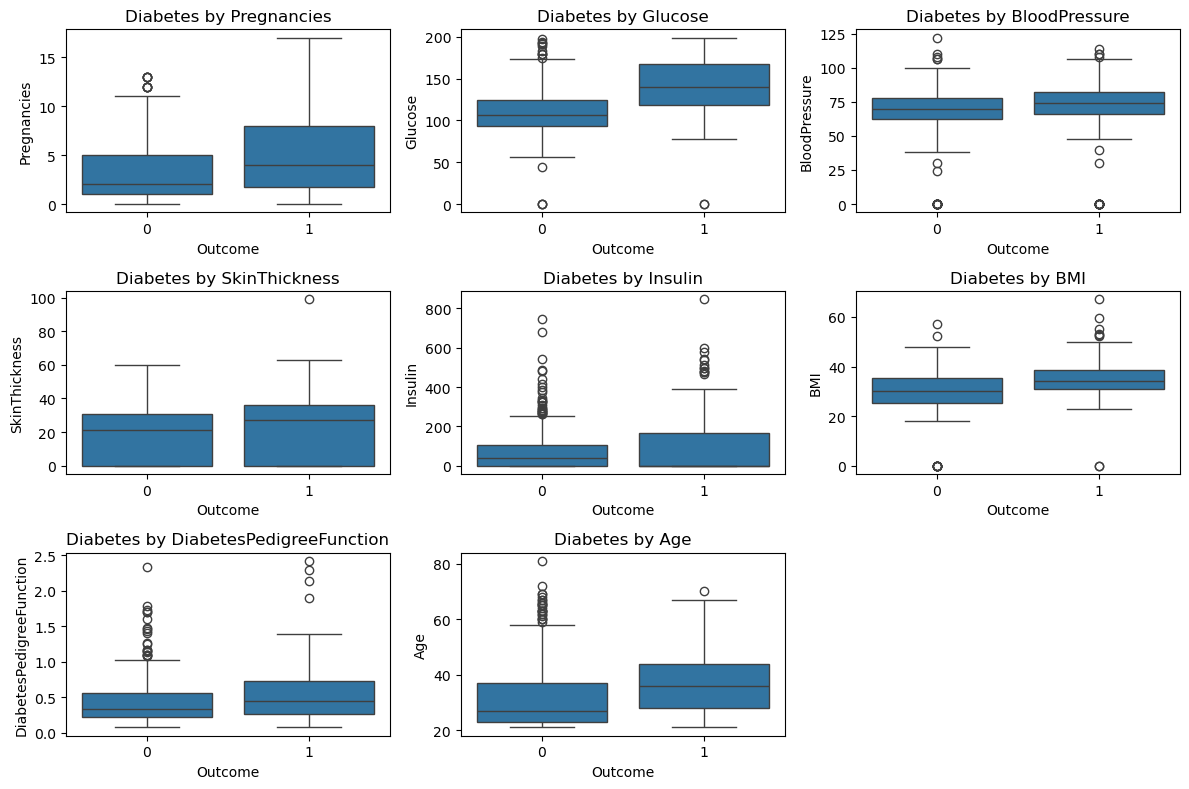

In [10]:
# All Features vs Outcome - Boxplot
plt.figure(figsize=(12, 8))

for i, column in enumerate(df.columns[:-1], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=df)
    plt.title(f'Diabetes by {column}')

plt.tight_layout()
plt.show()

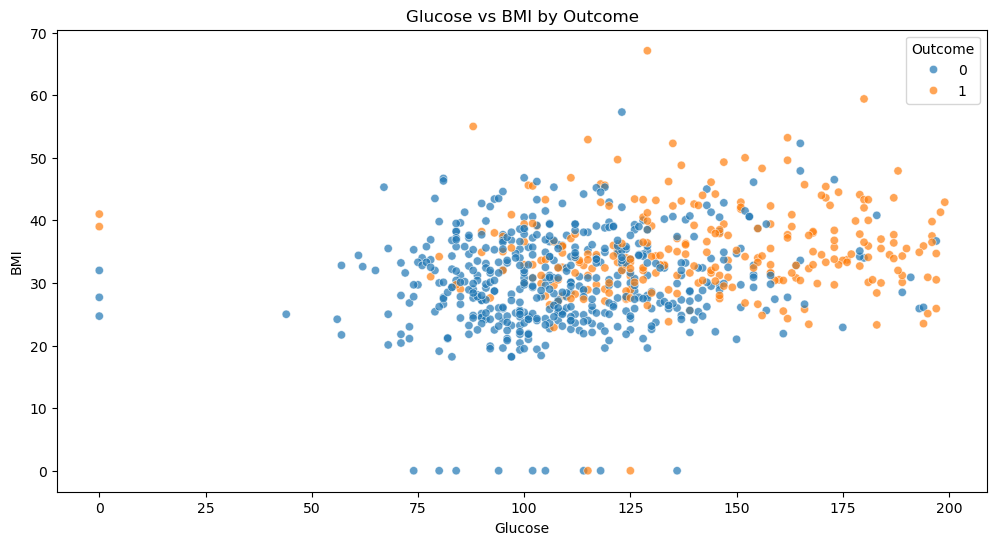

In [11]:
# Glucose vs BMI grouped by Outcome
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Glucose', 
                y='BMI', 
                hue='Outcome', 
                data=df, 
                alpha=0.7
)

plt.title('Glucose vs BMI by Outcome')
plt.show()

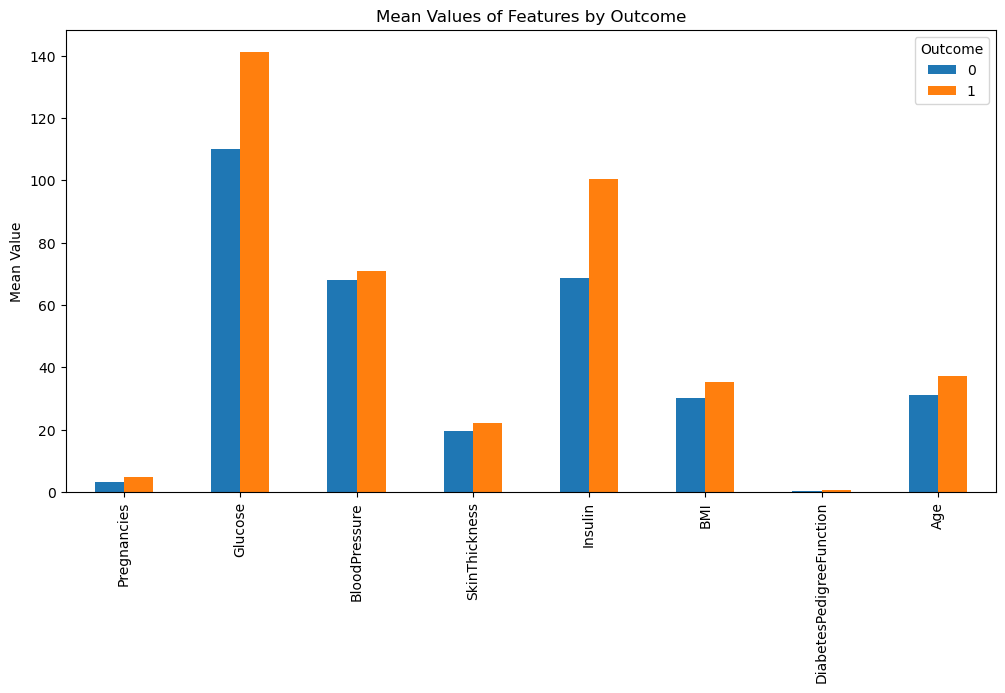

In [12]:
# Mean Values of Features grouped by Outcome
mean_values = df.groupby('Outcome').mean().T

mean_values.plot(kind='bar', figsize=(12, 6))

plt.title('Mean Values of Features by Outcome')
plt.ylabel('Mean Value')

plt.show()

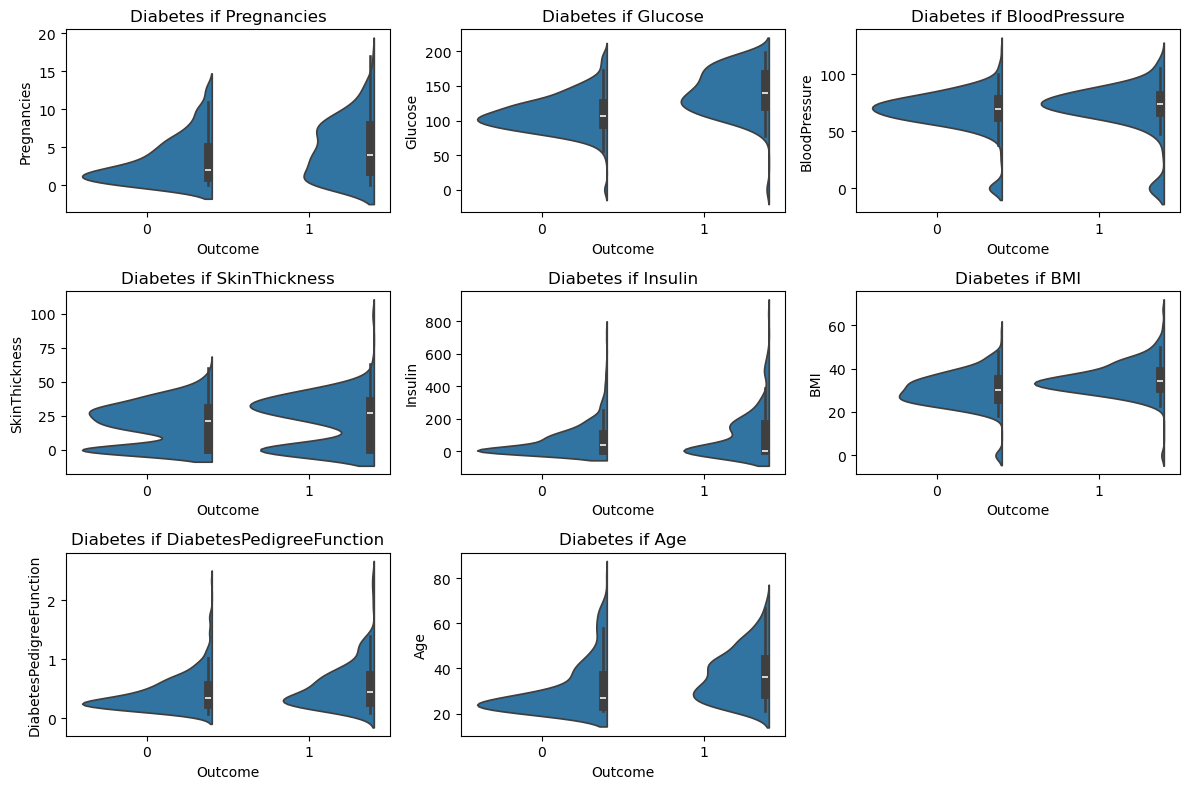

In [13]:
# Features grouped by Outcome - Violin plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(df.columns[:-1]):  # Excluding Outcome
    sns.violinplot(x='Outcome', y=column, data=df, split=True, ax=axes[i])
    axes[i].set_title(f'Diabetes if {column}')

# Hiding unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

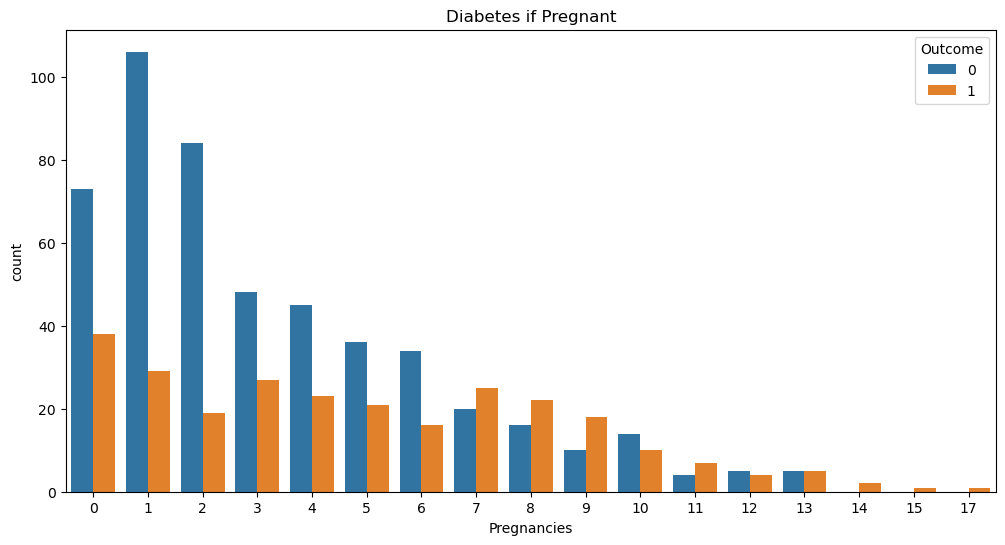

In [14]:
# Diabetes if Pregnant
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

plt.title('Diabetes if Pregnant')
plt.show()